<h1><center>Predicting Employee Retention using ML Algorithms</center></h1>

Dataset is downloaded from Kaggle. Link: https://www.kaggle.com/giripujar/hr-analytics

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<h2 style="color:blue">Data exploration and visualization</h2>

In [3]:
left = df[df.left==1]
left.shape

(3571, 10)

In [4]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [5]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


Text(0.5, 1.0, 'Class counts')

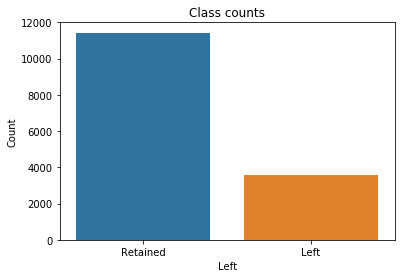

In [6]:
pos = df[df["left"] == 1].shape[0]
neg = df[df["left"] == 0].shape[0]
sns.countplot(df["left"])
plt.xticks((0, 1), ["Retained", "Left"])
plt.xlabel("Left or Retained")
plt.ylabel("Count")
plt.title("Class counts")

**Average numbers for all columns** 

In [7]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,
<ol>
    <li><b>Satisfaction Level</b>: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)</li>
    <li><b>Average Monthly Hours</b>: Average monthly hours are higher in employees leaving the firm (199 vs 207)</li>
    
</ol>

**Impact of salary on employee retention**

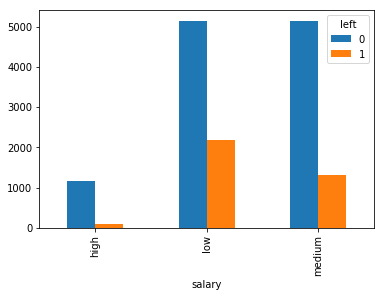

In [8]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

**Salaries:** Above bar chart shows that effect of salaries can be ignored.

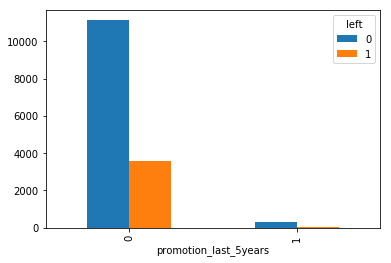

In [9]:
pd.crosstab(df.promotion_last_5years,df.left).plot(kind='bar')

**Promotion Last 5 Years**: The above chart shows that employees given promotion are less likely to leave the company

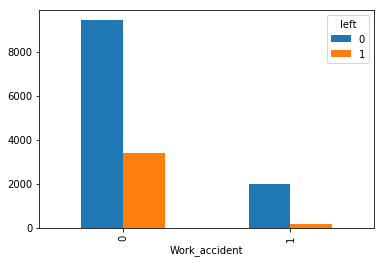

In [10]:
pd.crosstab(df.Work_accident,df.left).plot(kind='bar')

**Work Accident:** Above chart shows that relationship between employee retention and work accidents can be ignored.

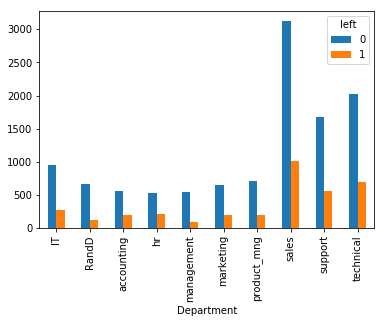

In [11]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

**Department wise employee retention rate:** From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

**Tackle salary dummy variable**

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. 

In [12]:
salary_dummies = pd.get_dummies(df.salary, prefix="salary")

In [13]:
df_with_dummies = pd.concat([df,salary_dummies],axis='columns')

In [14]:
df_with_dummies.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0


Now we need to remove salary column which is text data. It is already replaced by dummy variables so we can safely remove it

In [15]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,0,1,0


<h3 style="color:purple">From the data analysis so far we can conclude that we will use following variables as dependant variables in our model</h3><b>
<ol>
    <li>Satisfaction Level</li>
    <li>Average Monthly Hours</li>
    <li>Promotion Last 5 Years</li>
    <li>Work Accidents</li></b>
</ol>

In [16]:
subdf = df[['satisfaction_level','average_montly_hours','Work_accident','promotion_last_5years']]
subdf.head()

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years
0,0.38,157,0,0
1,0.80,262,0,0
2,0.11,272,0,0
3,0.72,223,0,0
4,0.37,159,0,0


In [17]:
#X = df_with_dummies
X=subdf
X.head()

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years
0,0.38,157,0,0
1,0.80,262,0,0
2,0.11,272,0,0
3,0.72,223,0,0
4,0.37,159,0,0


In [18]:
y = df.left

<h2 style="color:blue">Modelling</h1>

<h3>Using SVC</h3>

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

C:\Users\pc-pc\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [20]:
from sklearn.svm import SVC
model = SVC()

In [21]:
model.fit(X_train, y_train)

C:\Users\pc-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [22]:
y_predicted = model.predict(X_test)

**Accuracy of the model**

In [23]:
model.score(X_test,y_test)

0.8445714285714285

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[7489,  487],
       [1145, 1379]], dtype=int64)

Text(69.0, 0.5, 'Truth')

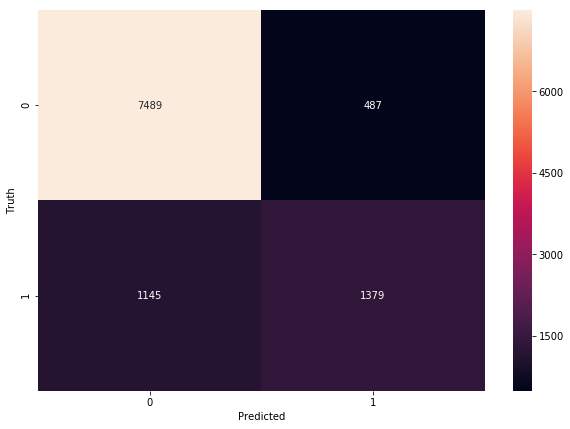

In [25]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3>Using Random Forest</h3>

In [26]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
y_predicted = model.predict(X_test)

In [28]:
model.score(X_test,y_test)

0.9144761904761904

In [29]:
cm2 = confusion_matrix(y_test, y_predicted)
cm2

array([[7603,  373],
       [ 525, 1999]], dtype=int64)

Text(69.0, 0.5, 'Truth')

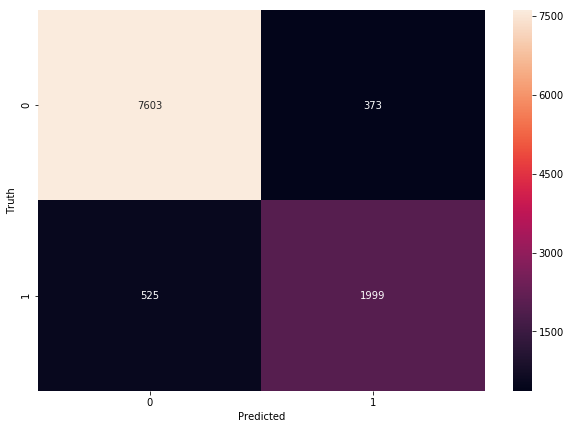

In [30]:
plt.figure(figsize=(10,7))
sns.heatmap(cm2, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3>Using KNN</h3>

In [31]:
from sklearn.neighbors import KNeighborsClassifier
k = 6
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [32]:
y_predicted = neigh.predict(X_test)
neigh.score(X_test,y_test)

0.8636190476190476

Text(69.0, 0.5, 'Truth')

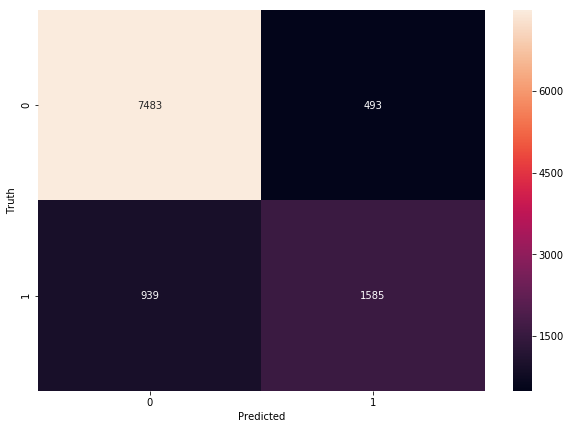

In [33]:
cm3 = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(10,7))
sns.heatmap(cm3, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
